In [ ]:
# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# import scipy 
# from scipy.spatial.distance import cdist

# import matplotlib.pyplot as plt

# from sklearn.cluster import KMeans, MiniBatchKMeans, DBSCAN
# from sklearn import metrics
# from sklearn.feature_extraction.text import *
# from sklearn.feature_selection import *
# from sklearn.preprocessing import *
# from sklearn.feature_extraction import text
# from sklearn.feature_selection import VarianceThreshold

# from nltk.stem import SnowballStemmer

# import time

# from wordcloud import WordCloud

# import dill

In [22]:
import pandas as pd
import time
import matplotlib.pyplot as plt

In [2]:
data_filepath = "../data/steam_reviews.csv"

In [3]:
start = time.time()

# Every 2000000 rows occupy ~1GB of main memory and it takes ~21 sec to fetch the data
df = pd.read_csv(data_filepath, nrows=1000000)

print("time to fetch data=", time.time()-start)

time to fetch data= 6.035313844680786


In [4]:
df.head(5)

,Unnamed: 0,app_id,app_name,review_id,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,...,steam_purchase,received_for_free,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
0,0,292030,The Witcher 3: Wild Hunt,85185598,schinese,不玩此生遗憾，RPG游戏里的天花板，太吸引人了,1611381629,1611381629,True,0,...,True,False,False,76561199095369542,6,2,1909.0,1448.0,1909.0,1.611343e+09
1,1,292030,The Witcher 3: Wild Hunt,85185250,schinese,拔DIAO无情打桩机--杰洛特!!!,1611381030,1611381030,True,0,...,True,False,False,76561198949504115,30,10,2764.0,2743.0,2674.0,1.611386e+09
2,2,292030,The Witcher 3: Wild Hunt,85185111,schinese,巫师3NB,1611380800,1611380800,True,0,...,True,False,False,76561199090098988,5,1,1061.0,1061.0,1060.0,1.611384e+09
3,3,292030,The Witcher 3: Wild Hunt,85184605,english,"One of the best RPG's of all time, worthy of a...",1611379970,1611379970,True,0,...,True,False,False,76561199054755373,5,3,5587.0,3200.0,5524.0,1.611384e+09
4,4,292030,The Witcher 3: Wild Hunt,85184287,schinese,大作,1611379427,1611379427,True,0,...,True,False,False,76561199028326951,7,4,217.0,42.0,217.0,1.610788e+09


# Clean Data

## Search and Remove Null Values

In [10]:
df.loc[:, df.isnull().any()].columns

Index(['review', 'author.playtime_at_review'], dtype='object')

In [12]:
# Number of NaN in each column
df.isna().sum()

Unnamed: 0                           0
app_id                               0
app_name                             0
review_id                            0
language                             0
review                            1758
timestamp_created                    0
timestamp_updated                    0
recommended                          0
votes_helpful                        0
votes_funny                          0
weighted_vote_score                  0
comment_count                        0
steam_purchase                       0
received_for_free                    0
written_during_early_access          0
author.steamid                       0
author.num_games_owned               0
author.num_reviews                   0
author.playtime_forever              0
author.playtime_last_two_weeks       0
author.playtime_at_review         2314
author.last_played                   0
dtype: int64

In [13]:
# Percentage of NaN in each column
df.isna().sum() / len(df) * 100
# Null:
# 0.23% for author.playtime_at_review
# 0.18% for review

Unnamed: 0                        0.0000
app_id                            0.0000
app_name                          0.0000
review_id                         0.0000
language                          0.0000
review                            0.1758
timestamp_created                 0.0000
timestamp_updated                 0.0000
recommended                       0.0000
votes_helpful                     0.0000
votes_funny                       0.0000
weighted_vote_score               0.0000
comment_count                     0.0000
steam_purchase                    0.0000
received_for_free                 0.0000
written_during_early_access       0.0000
author.steamid                    0.0000
author.num_games_owned            0.0000
author.num_reviews                0.0000
author.playtime_forever           0.0000
author.playtime_last_two_weeks    0.0000
author.playtime_at_review         0.2314
author.last_played                0.0000
dtype: float64

In [19]:
# Remove Null
df = df.dropna()

In [17]:
df.isna().sum()

Unnamed: 0                        0
app_id                            0
app_name                          0
review_id                         0
language                          0
review                            0
timestamp_created                 0
timestamp_updated                 0
recommended                       0
votes_helpful                     0
votes_funny                       0
weighted_vote_score               0
comment_count                     0
steam_purchase                    0
received_for_free                 0
written_during_early_access       0
author.steamid                    0
author.num_games_owned            0
author.num_reviews                0
author.playtime_forever           0
author.playtime_last_two_weeks    0
author.playtime_at_review         0
author.last_played                0
dtype: int64

In [20]:
print("Number of clean records in first 1,000,000 data:", len(df))
#NOTE: NA rows doesn't overlap at all

Number of clean records in first 1,000,000 data: 995928


# Exploratory Data Analysis

In [21]:
ana_df = df[df.language == 'english'].drop(columns=['Unnamed: 0','app_id','language','review_id', 'author.steamid'])

array([[<AxesSubplot:title={'center':'timestamp_created'}>,
        <AxesSubplot:title={'center':'timestamp_updated'}>,
        <AxesSubplot:title={'center':'votes_helpful'}>],
       [<AxesSubplot:title={'center':'votes_funny'}>,
        <AxesSubplot:title={'center':'weighted_vote_score'}>,
        <AxesSubplot:title={'center':'comment_count'}>],
       [<AxesSubplot:title={'center':'author.num_games_owned'}>,
        <AxesSubplot:title={'center':'author.num_reviews'}>,
        <AxesSubplot:title={'center':'author.playtime_forever'}>],
       [<AxesSubplot:title={'center':'author.playtime_last_two_weeks'}>,
        <AxesSubplot:title={'center':'author.playtime_at_review'}>,
        <AxesSubplot:title={'center':'author.last_played'}>]],
      dtype=object)

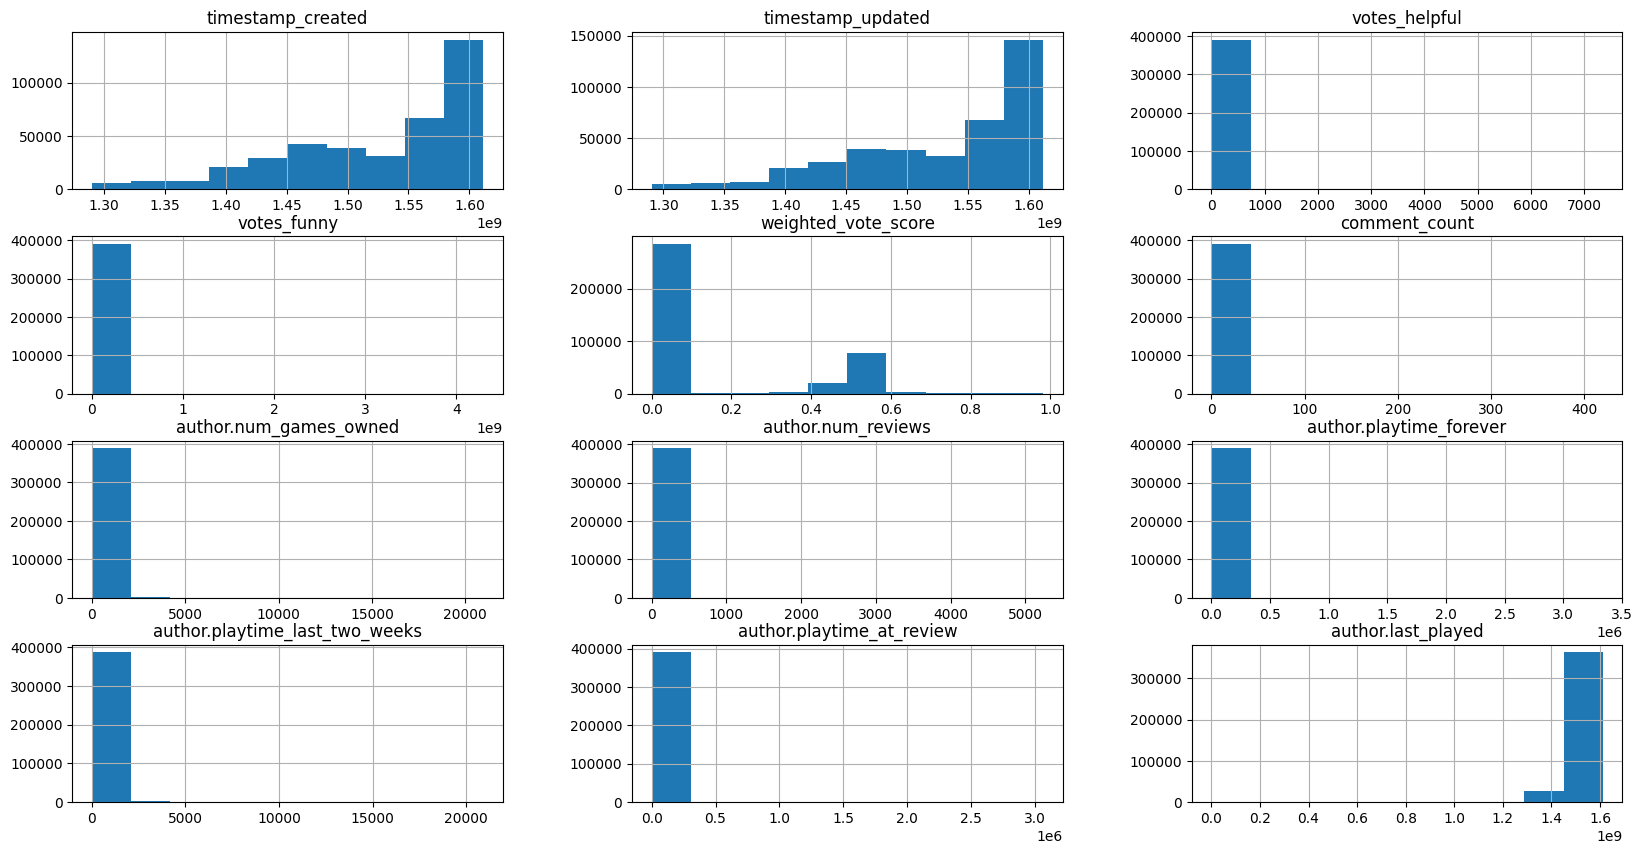

In [40]:
ana_df.hist(figsize=(20,10))



Text(0, 0.5, 'Occurrences')

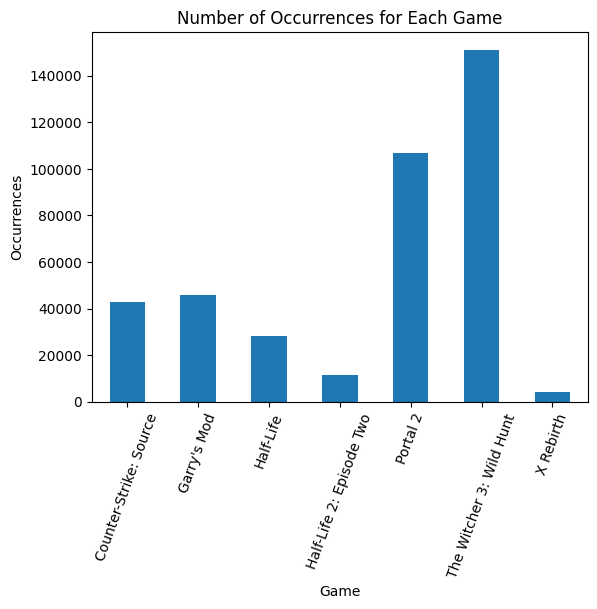

In [43]:
ax = ana_df["app_name"].value_counts().sort_index().plot.bar(rot=70)
ax.set_title("Number of Occurrences for Each Game")
ax.set_xlabel("Game")
ax.set_ylabel("Occurrences")

<AxesSubplot:ylabel='Frequency'>

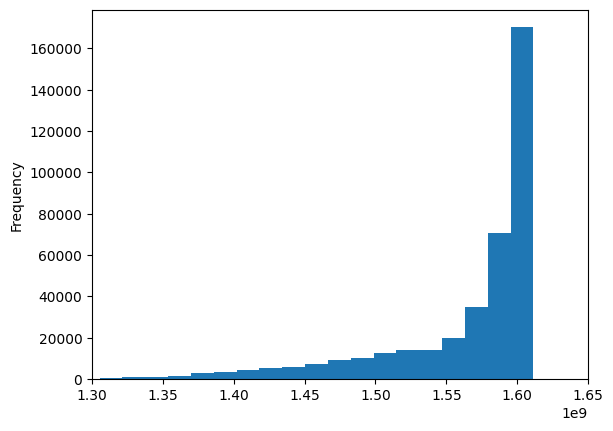

In [57]:
ana_df['author.last_played'].plot.hist(xlim=(1.3e9, 1.65e9), bins=100)

Text(0, 0.5, 'Frequency')

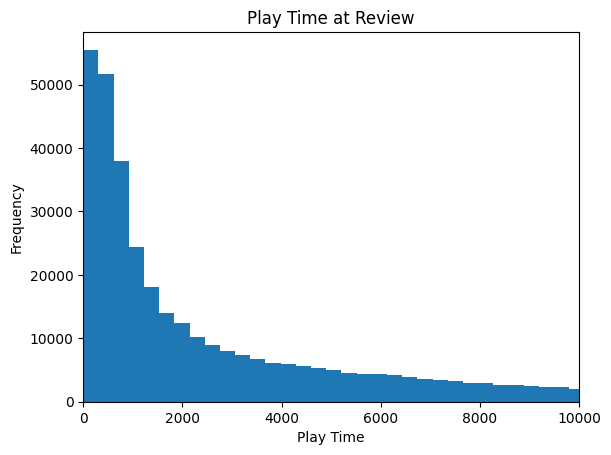

In [69]:
ax = ana_df['author.playtime_at_review'].plot.hist(xlim=(0, 10000), bins=10000)
ax.set_title("Play Time at Review")
ax.set_xlabel("Play Time")
ax.set_ylabel("Frequency")